In [30]:
import pandas as pd
import numpy as np
import requests
import yfinance as yf
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import time, io
from datetime import datetime, timedelta


plt.style.use('seaborn-v0_8')

In [31]:

# Load CSV
nifty_df = pd.read_csv("nifty-50-stock-list.csv")

# Clean column names and symbols
nifty_df.columns = nifty_df.columns.str.strip().str.title()  # Symbol, Company Name, Sector
nifty_df['Symbol'] = nifty_df['Symbol'].str.strip().str.upper()

print(" Loaded NIFTY50 stock list")
display(nifty_df.head())


 Loaded NIFTY50 stock list


,Symbol,Company Name,Sector
0,RELIANCE,Reliance Industries Ltd.,Oil & Gas
1,TCS,Tata Consultancy Services Ltd.,Information Technology
2,HDFCBANK,HDFC Bank Ltd.,Financial Services
3,INFY,Infosys Ltd.,Information Technology
4,ICICIBANK,ICICI Bank Ltd.,Financial Services


In [32]:

all_data = []

for symbol, sector in zip(nifty_df['Symbol'], nifty_df['Sector']):
    try:
        ticker = yf.Ticker(symbol + ".NS")
        df = ticker.history(period="1d", interval="1m")[['High','Low','Close']]
        if df.empty:
            print(f" No data for {symbol}")
            continue
        df = df.reset_index()
        df['Symbol'] = symbol
        df['Sector'] = sector
        all_data.append(df)
        print(f" {symbol} data fetched ({len(df)} rows)")
    except Exception as e:
        print(f" Error fetching {symbol}: {e}")

# Combine all stocks
intraday_df = pd.concat(all_data, ignore_index=True)
print(" Combined intraday data")
display(intraday_df.head())


 RELIANCE data fetched (375 rows)
 TCS data fetched (375 rows)
 HDFCBANK data fetched (375 rows)
 INFY data fetched (375 rows)
 ICICIBANK data fetched (375 rows)
 HINDUNILVR data fetched (375 rows)
 ITC data fetched (375 rows)
 SBIN data fetched (375 rows)
 BHARTIARTL data fetched (375 rows)
 KOTAKBANK data fetched (375 rows)
 LT data fetched (375 rows)
 AXISBANK data fetched (375 rows)
 WIPRO data fetched (375 rows)
 ASIANPAINT data fetched (375 rows)
 HCLTECH data fetched (375 rows)
 MARUTI data fetched (375 rows)
 BAJFINANCE data fetched (375 rows)
 TITAN data fetched (375 rows)
 SUNPHARMA data fetched (375 rows)
 TECHM data fetched (375 rows)
 NESTLEIND data fetched (375 rows)
 POWERGRID data fetched (375 rows)
 ULTRACEMCO data fetched (375 rows)
 ADANIENT data fetched (375 rows)


$TATAMOTORS.NS: possibly delisted; no price data found  (period=1d)


 No data for TATAMOTORS
 ONGC data fetched (375 rows)
 TATASTEEL data fetched (375 rows)
 JSWSTEEL data fetched (375 rows)
 NTPC data fetched (375 rows)
 INDUSINDBK data fetched (375 rows)
 M&M data fetched (375 rows)
 COALINDIA data fetched (375 rows)
 BAJAJFINSV data fetched (375 rows)
 HINDALCO data fetched (375 rows)
 DRREDDY data fetched (375 rows)
 GRASIM data fetched (375 rows)
 DIVISLAB data fetched (375 rows)
 BAJAJ-AUTO data fetched (375 rows)
 BRITANNIA data fetched (375 rows)
 HEROMOTOCO data fetched (375 rows)
 ADANIPORTS data fetched (375 rows)
 CIPLA data fetched (375 rows)
 UPL data fetched (375 rows)
 SBILIFE data fetched (375 rows)
 EICHERMOT data fetched (375 rows)
 BPCL data fetched (375 rows)
 TATACONSUM data fetched (375 rows)
 APOLLOHOSP data fetched (375 rows)
 SHREECEM data fetched (355 rows)


$HDFC.NS: possibly delisted; no price data found  (period=1d) (Yahoo error = "No data found, symbol may be delisted")


 No data for HDFC
 Combined intraday data


,Datetime,High,Low,Close,Symbol,Sector
0,2025-10-24 09:15:00+05:30,1449.900024,1446.800049,1446.800049,RELIANCE,Oil & Gas
1,2025-10-24 09:16:00+05:30,1445.400024,1441.099976,1441.300049,RELIANCE,Oil & Gas
2,2025-10-24 09:17:00+05:30,1444.800049,1441.300049,1444.500000,RELIANCE,Oil & Gas
3,2025-10-24 09:18:00+05:30,1445.199951,1443.199951,1444.400024,RELIANCE,Oil & Gas
4,2025-10-24 09:19:00+05:30,1444.400024,1443.099976,1443.800049,RELIANCE,Oil & Gas


In [33]:
# Ensure numeric types
intraday_df['High'] = pd.to_numeric(intraday_df['High'], errors='coerce')
intraday_df['Low'] = pd.to_numeric(intraday_df['Low'], errors='coerce')
intraday_df['Close'] = pd.to_numeric(intraday_df['Close'], errors='coerce')

# Remove NaN rows
intraday_df.dropna(subset=['High','Low','Close'], inplace=True)

# Calculate intraday range and % change
intraday_df['Range'] = intraday_df['High'] - intraday_df['Low']
intraday_df['Pct_Change'] = intraday_df.groupby('Symbol')['Close'].pct_change() * 100

display(intraday_df.head())


,Datetime,High,Low,Close,Symbol,Sector,Range,Pct_Change
0,2025-10-24 09:15:00+05:30,1449.900024,1446.800049,1446.800049,RELIANCE,Oil & Gas,3.099976,NaN
1,2025-10-24 09:16:00+05:30,1445.400024,1441.099976,1441.300049,RELIANCE,Oil & Gas,4.300049,-0.380149
2,2025-10-24 09:17:00+05:30,1444.800049,1441.300049,1444.500000,RELIANCE,Oil & Gas,3.500000,0.222018
3,2025-10-24 09:18:00+05:30,1445.199951,1443.199951,1444.400024,RELIANCE,Oil & Gas,2.000000,-0.006921
4,2025-10-24 09:19:00+05:30,1444.400024,1443.099976,1443.800049,RELIANCE,Oil & Gas,1.300049,-0.041538


In [34]:
# Clean sector names
intraday_df['Sector'] = intraday_df['Sector'].str.strip().str.title()

# Average % change per sector
sector_momentum = (
    intraday_df.groupby('Sector')['Pct_Change']
    .mean()
    .reset_index()
    .rename(columns={'Pct_Change':'Avg_Pct_Change'})
    .sort_values('Avg_Pct_Change', ascending=False)
)

print(" Sector Momentum")
display(sector_momentum.head(10))


 Sector Momentum


,Sector,Avg_Pct_Change
13,Telecommunication,0.002958
10,Oil & Gas,0.000630
6,Fmcg,0.000479
9,Metals & Mining,-0.000024
7,Healthcare,-0.000382
11,Power,-0.001011
3,Construction,-0.001124
8,Information Technology,-0.001213
5,Financial Services,-0.001340
4,Consumer Durables,-0.001351


In [35]:
# Calculate volatility per stock
volatility = (
    intraday_df.groupby('Symbol')['Pct_Change']
    .std()
    .reset_index()
    .rename(columns={'Pct_Change':'Volatility'})
)

# Merge sector info
volatility = volatility.merge(nifty_df[['Symbol','Sector']], on='Symbol', how='left')
volatility['Sector'] = volatility['Sector'].str.strip().str.title()

# Top 10 volatile stocks
top_vol = volatility.sort_values('Volatility', ascending=False).head(10)
display(top_vol)


,Symbol,Volatility,Sector
9,BPCL,0.080374,Oil & Gas
14,DRREDDY,0.073466,Healthcare
20,HINDALCO,0.073327,Metals & Mining
40,TATACONSUM,0.072632,Fmcg
36,SBILIFE,0.072455,Financial Services
16,GRASIM,0.071914,Cement
11,CIPLA,0.069732,Healthcare
38,SHREECEM,0.066203,Cement
26,JSWSTEEL,0.066134,Metals & Mining
19,HEROMOTOCO,0.064741,Automobile


In [36]:
top_vol = volatility.sort_values('Volatility', ascending=False).head(10)
print(top_vol)


        Symbol  Volatility              Sector
9         BPCL    0.080374           Oil & Gas
14     DRREDDY    0.073466          Healthcare
20    HINDALCO    0.073327     Metals & Mining
40  TATACONSUM    0.072632                Fmcg
36     SBILIFE    0.072455  Financial Services
16      GRASIM    0.071914              Cement
11       CIPLA    0.069732          Healthcare
38    SHREECEM    0.066203              Cement
26    JSWSTEEL    0.066134     Metals & Mining
19  HEROMOTOCO    0.064741          Automobile


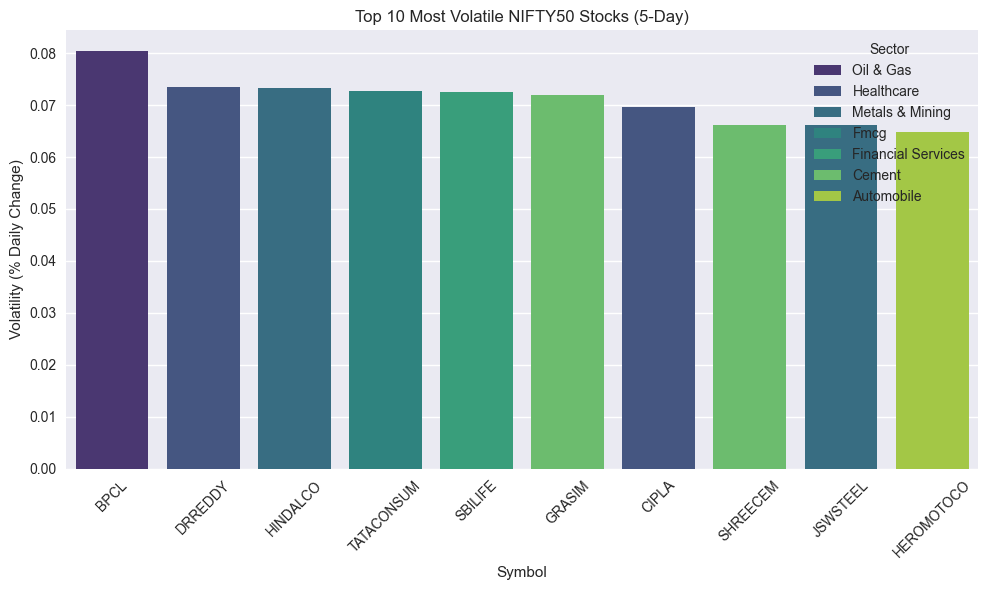

In [37]:
plt.figure(figsize=(10,6))
sns.barplot(data=top_vol, x='Symbol', y='Volatility', hue='Sector', dodge=False, palette='viridis')
plt.title('Top 10 Most Volatile NIFTY50 Stocks (5-Day)')
plt.ylabel('Volatility (% Daily Change)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [38]:
top_sector = sector_momentum.sort_values('Avg_Pct_Change', ascending=False).iloc[0]
print(f"Sector with highest momentum: {top_sector['Sector']}")
print(f"Average daily % change: {top_sector['Avg_Pct_Change']:.2f}%")


Sector with highest momentum: Telecommunication
Average daily % change: 0.00%


In [39]:
intraday_df['Intraday_Change'] = (intraday_df['High'] - intraday_df['Low']) / intraday_df['Low'] * 100


In [40]:
display(intraday_df.head())

,Datetime,High,Low,Close,Symbol,Sector,Range,Pct_Change,Intraday_Change
0,2025-10-24 09:15:00+05:30,1449.900024,1446.800049,1446.800049,RELIANCE,Oil & Gas,3.099976,NaN,0.214264
1,2025-10-24 09:16:00+05:30,1445.400024,1441.099976,1441.300049,RELIANCE,Oil & Gas,4.300049,-0.380149,0.298387
2,2025-10-24 09:17:00+05:30,1444.800049,1441.300049,1444.500000,RELIANCE,Oil & Gas,3.500000,0.222018,0.242836
3,2025-10-24 09:18:00+05:30,1445.199951,1443.199951,1444.400024,RELIANCE,Oil & Gas,2.000000,-0.006921,0.138581
4,2025-10-24 09:19:00+05:30,1444.400024,1443.099976,1443.800049,RELIANCE,Oil & Gas,1.300049,-0.041538,0.090087


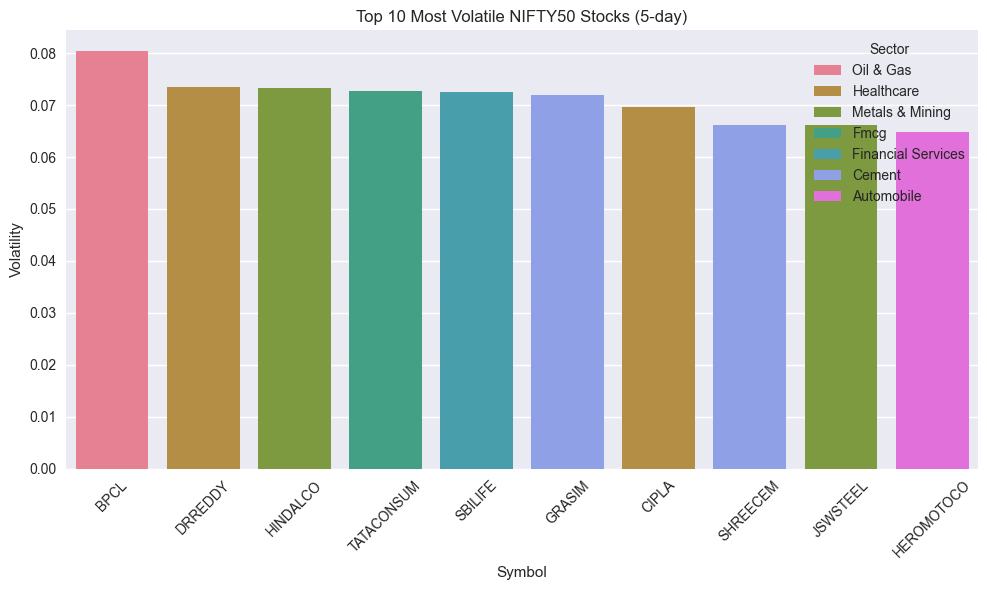

In [41]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=top_vol,
    x='Symbol',
    y='Volatility',  # Use exact column name!
    hue='Sector'
)
plt.title('Top 10 Most Volatile NIFTY50 Stocks (5-day)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

